# Week 04. Machine Learning with Text Data

Natural Language Processing for Law and Social Science<br>
Elliott Ash, ETH Zurich

In [1]:
# set random seed
import numpy as np
np.random.seed(4)

In [2]:
# If you are using Google Colab, here's the code to load sc_cases_cleaned.pkl from local. 
from google.colab import files
uploaded = files.upload()

Saving sc_cases_cleaned.pkl to sc_cases_cleaned.pkl


In [3]:
# set up
import warnings; warnings.simplefilter('ignore')
%matplotlib notebook
import pandas as pd
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957


In [5]:
df = df.assign(authorship_id=(df['authorship']).astype('category').cat.codes)
df['authorship'].value_counts() 

SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: authorship, dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'log_cite_count'}>]], dtype=object)

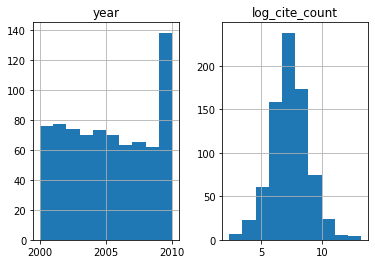

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
df[['year','log_cite_count']].hist()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=4,
                        stop_words='english',
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['opinion_text'])
words = vectorizer.get_feature_names_out()
print(words)
X

['act' 'congress' 'district' 'state']


<768x4 sparse matrix of type '<class 'numpy.int64'>'
	with 2534 stored elements in Compressed Sparse Row format>

In [32]:
# X = X.todense()
X = X / X.sum(axis=1) # counts to frequencies
for i, word in enumerate(words):
    column = X[:,i]
    df['x_'+word] = column
df

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count,authorship_id,x_act,x_congress,x_district,x_state
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392,2,0.193548,0.225806,0.161290,0.419355
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174,9,0.261905,0.095238,0.047619,0.595238
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952,4,0.012821,0.025641,0.461538,0.500000
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817,3,0.322581,0.129032,0.000000,0.548387
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957,3,0.019231,0.000000,0.596154,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,"MICHAEL F. EASLEY, * GOVERNOR OF NORTH CAROLIN...",majority,2001-04-18,BREYER,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', ""O'CONNO...","['KENNEDY, ANTHONY', 'REHNQUIST, WILLIAM', 'SC...",2.0,1236.0,JUSTICE BREYER delivered the opinion of the Co...,2001,7.119636,1,0.000000,0.000000,0.928994,0.071006
764,"GAIL ATWATER, et al. v. CITY OF LAGO VISTA et al.",majority,2001-04-24,SOUTER,1.0,"['KENNEDY, ANTHONY', 'REHNQUIST, WILLIAM', 'SC...","['BREYER, STEPHEN', 'GINSBURG, RUTH', ""O'CONNO...",1.0,3120.0,JUSTICE SOUTER delivered the opinion of the Co...,2001,8.045588,8,0.292308,0.046154,0.092308,0.569231
765,"JAMES ALEXANDER, DIRECTOR, ALABAMA DEPARTMENT ...",majority,2001-04-24,SCALIA,1.0,"['KENNEDY, ANTHONY', ""O'CONNOR, SANDRA"", 'REHN...","['BREYER, STEPHEN', 'GINSBURG, RUTH', 'SOUTER,...",9.0,4986.0,JUSTICE SCALIA delivered the opinion of the Co...,2001,8.514389,7,0.279070,0.465116,0.093023,0.162791
766,UNITED STATES v. OAKLAND CANNABIS BUYERS' COOP...,majority,2001-05-14,THOMAS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,736.0,JUSTICE THOMAS delivered the opinion of the Co...,2001,6.601230,10,0.312500,0.260417,0.427083,0.000000


In [33]:
# inspecting data
import numpy as np
features = ['x_'+x for x in words]
cites_features = ['log_cite_count'] + features
df2 = df[cites_features]
corr_matrix = df2.corr()
corr_matrix['log_cite_count'].sort_values(ascending=False)

log_cite_count    1.000000
x_state           0.153254
x_district        0.111862
x_congress       -0.137626
x_act            -0.237354
Name: log_cite_count, dtype: float64

array([[<AxesSubplot:xlabel='log_cite_count', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_act', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_congress', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_district', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_state', ylabel='log_cite_count'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_district', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_state', ylabel='x_act'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_district', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_state', ylabel='x_congress'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='

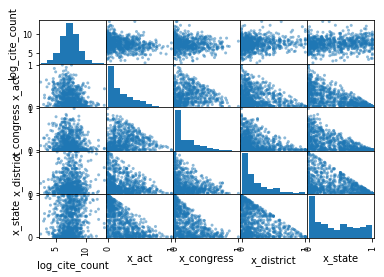

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2)

<AxesSubplot:xlabel='x_act', ylabel='log_cite_count'>

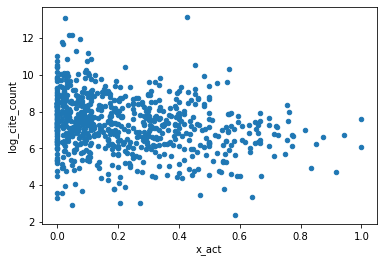

In [41]:
df2.plot(kind='scatter', x='x_act', y='log_cite_count')

# Regression

In [42]:
# create a test set 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

In [43]:
Xtrain = train[features]
Ytrain = train['log_cite_count']
Xtrain.head()

,x_act,x_congress,x_district,x_state
596,0.173913,0.369565,0.152174,0.304348
90,0.022388,0.000000,0.149254,0.828358
734,0.774194,0.096774,0.096774,0.032258
694,0.282051,0.256410,0.128205,0.333333
517,0.016949,0.000000,0.000000,0.983051


In [44]:
Ytrain.head()

596    8.449771
90     8.477620
734    6.648985
694    5.236442
517    3.583519
Name: log_cite_count, dtype: float64

In [45]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(Xtrain, Ytrain)
lin_reg.coef_ 

array([-1.05443811, -0.27079188,  0.87434979,  0.45088019])

In [46]:
# in-sample performance
from sklearn.metrics import mean_squared_error
Ytrain_pred = lin_reg.predict(Xtrain)        
train_mse = mean_squared_error(Ytrain,Ytrain_pred)
train_mse

2.1599649495666817

In [47]:
# out-of-sample performance
Xtest = test[features]
Ytest = test['log_cite_count']
Ytest_pred = lin_reg.predict(Xtest)        
test_mse = mean_squared_error(Ytest,Ytest_pred)
test_mse

2.1030016631048745

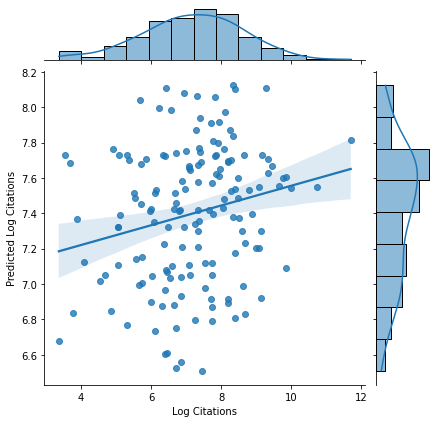

In [48]:
import seaborn as sns

p = sns.jointplot(x=Ytest, y=Ytest_pred, kind='reg')
p.set_axis_labels('Log Citations', 'Predicted Log Citations', fontsize=10)


# Pipelines and Cross-Validation

In [49]:
# missing values
df['authorship_id'].fillna(0,inplace=True)

In [50]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df2)
df2 = pd.DataFrame(X,columns=df2.columns)

In [51]:
X

array([[ 0.4273395 , -0.10042156,  0.26583686, -0.25620003,  0.08875597],
       [-1.69574977,  0.2303693 , -0.38976878, -0.73332927,  0.62993863],
       [ 1.7975002 , -0.97500173, -0.73922735,  1.00407587,  0.33689649],
       ...,
       [ 0.778854  ,  0.31343437,  1.46745168, -0.54274748, -0.70067715],
       [-0.48288351,  0.47521029,  0.43962056,  0.85945227, -1.20157476],
       [ 0.20858247,  0.53243068, -0.86797524, -0.93320774,  0.87744045]])

In [53]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
judge = df['authorship_id']
print(judge.values.shape)
print(judge.values.reshape(-1,1).shape)
judge_fes = encoder.fit_transform(judge.values.reshape(-1,1))
judge_ids = ['j_'+str(x) for x in range(len(judge.unique()))]
judge_fes = pd.DataFrame(judge_fes.todense(),columns=judge_ids)
df = pd.concat([df,judge_fes],axis=1)
train, test = train_test_split(df, test_size=0.2)

(768,)
(768, 1)


In [55]:
# Cross-validation
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,
                         df[features],
                         df['x_republican'],
                         cv=3,
                         n_jobs=-1)

# the default score for random forest reg is negative MSE.
print(np.abs(scores.mean()),scores.std())

0.08779109432773417 0.022789022811549944


In [56]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=3)              
grid_search.fit(df[features],df['x_republican'])

print(grid_search.best_params_)
print(np.abs(grid_search.best_score_))

{'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.09341235411244335


In [59]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=3)              
rand_search.fit(df[features],df['x_republican'])

print(rand_search.best_params_)
print(np.abs(rand_search.best_score_))

{'n_estimators': 30, 'max_features': 2, 'bootstrap': True}
0.08245484631700421


In [61]:
# Saving and loading
import joblib
joblib.dump(forest_reg,'forest_reg.pkl') # will overwrite local files
forest_reg = joblib.load('forest_reg.pkl')

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('forest_reg', RandomForestRegressor()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (2, 4, 8, 16),
    'forest_reg__n_estimators': [3, 10, 30],
    'forest_reg__max_features': [2, 4],
    'forest_reg__bootstrap': [True, False]}

In [63]:
from pprint import pprint
from time import time

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(df.opinion_text, df.log_cite_count)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'forest_reg']
parameters:
{'forest_reg__bootstrap': [True, False],
 'forest_reg__max_features': [2, 4],
 'forest_reg__n_estimators': [3, 10, 30],
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (2, 4, 8, 16)}
Fitting 5 folds for each of 144 candidates, totalling 720 fits
done in 2514.982s

Best score: 0.176
Best parameters set:
	forest_reg__bootstrap: True
	forest_reg__max_features: 2
	forest_reg__n_estimators: 30
	vect__max_df: 0.75
	vect__max_features: 16


## Nested Cross-Validation

In [64]:
import numpy as np
from sklearn.model_selection import KFold
n = 30

forest_reg = RandomForestRegressor()
non_nested_scores = np.zeros(n)
nested_scores = np.zeros(n)


param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

for i in range(n):

    # Choose cross-validation techniques for the inner and outer loops,

    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=inner_cv)
    grid_search.fit(Xtrain, Ytrain)
    non_nested_scores[i] = grid_search.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(grid_search, X=Xtrain, y=Ytrain, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))


Average difference of 0.014238 with std. dev. of 0.021509.


# Regularization

In [65]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1)
y = y.ravel()

from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2) # also adds interactions
X_poly_2 = poly_2.fit_transform(x)


poly_300 = PolynomialFeatures(degree=300) 
X_poly_300 = poly_300.fit_transform(x)


lin_reg = LinearRegression()
cross_val_score(lin_reg, x, y, cv=3, n_jobs=3).mean()

0.4100209587834282

In [66]:
cross_val_score(lin_reg, X_poly_2, y, cv=3, n_jobs=3).mean()

0.8765265541770128

In [67]:
cross_val_score(lin_reg, X_poly_300, y, cv=3, n_jobs=3).mean()

-2212507309162538.0

In [68]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
cross_val_score(lasso_reg,x,y).mean()

0.3529145517634959

In [69]:
# Ridge
from sklearn.linear_model import Ridge, SGDRegressor
ridge_reg = Ridge(alpha=1)
cross_val_score(ridge_reg,x,y).mean()

0.3496477086077504

In [70]:
###
# Elastic Net
###
from sklearn.linear_model import ElasticNetCV
enet_reg = ElasticNetCV(alphas=[.0001, .001, .01,.1,1], 
                        l1_ratio=[.0001, .001, .01,.1,.5,.9, .99, 1])
enet_reg.fit(x,y)
enet_reg.alpha_, enet_reg.l1_ratio_

(0.1, 0.0001)

In [71]:
cross_val_score(enet_reg,x,y).mean()

0.3555344339965723

In [72]:
scaler = StandardScaler()
Xscale = scaler.fit_transform(X)
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(alpha=.1, l1_ratio=.0001)
enet_reg.fit(Xscale,df['x_republican'])
nonzero = enet_reg.coef_ != 0
print(nonzero.sum(),'non-zero of',len(enet_reg.coef_),'coefficients.')
X_enet = X[:,nonzero]
X_enet
cross_val_score(enet_reg,X_enet,df['x_republican'],n_jobs=-1).mean()

5 non-zero of 5 coefficients.


0.009194244568332843

# Classification

In [114]:
# Make a small data set
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer500 = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=500,
                        stop_words='english',
                        ngram_range=(1,3))
X500 = vectorizer500.fit_transform(df['opinion_text']).todense()
X500 = X500 / X500.sum(axis=1) # counts to frequencies
vocab = vectorizer500.get_feature_names_out()
for i, word in enumerate(vocab):
    column = X500[:,i]
    df['x_'+word] = column


features = [x for x in df.columns if x.startswith('x_') and x!="x_republican"]
keepcols = ['x_republican'] + features
df1 = df[keepcols]
y = df1['x_republican']
# set up train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
features = [x for x in df1.columns if x.startswith('x_') and x!="x_republican"]
df1.head()

,x_republican,x_000,x_10,x_100,x_101,x_102,x_103,x_104,x_104 ct,x_105,...,x_violated,x_violation,x_water,x_way,x_west,x_words,x_work,x_year,x_years,x_york
0,0.0,0.000000,0.000000,0.000000,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,...,0.000000,0.003419,0.000000,0.001709,0.000000,0.011966,0.000000,0.017094,0.000000,0.0
1,1.0,0.000000,0.002639,0.000000,0.002639,0.000000,0.000000,0.005277,0.002639,0.000000,...,0.002639,0.000000,0.000000,0.000000,0.005277,0.002639,0.000000,0.000000,0.000000,0.0
2,1.0,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001634,0.000000,0.001634,0.000000,0.000000,0.000000,0.013072,0.001634,0.0
3,1.0,0.000000,0.003652,0.001461,0.000000,0.000000,0.000730,0.000000,0.000000,0.006574,...,0.000000,0.000000,0.013879,0.002922,0.000000,0.000000,0.000000,0.000730,0.002922,0.0
4,1.0,0.001003,0.002006,0.001003,0.000000,0.000000,0.004012,0.000000,0.000000,0.001003,...,0.002006,0.002006,0.000000,0.000000,0.000000,0.000000,0.001003,0.003009,0.001003,0.0


In [120]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10) 
sgd_clf.fit(train[features], train['x_republican'])
sgd_clf.score(test[features],test['x_republican']) # accuracy on held-out data

0.8051948051948052

In [121]:
# compare to picking largest category
df1['x_republican'].mean()

0.7734375

In [122]:
from multiprocessing import cpu_count
nthreads = cpu_count() - 1

# Form cross-validated prdictions for all data points
from sklearn.model_selection import cross_val_predict
df1['x_republican_sgd'] = cross_val_predict(sgd_clf,
                                         df1[features],
                                         df1['x_republican'],
                                         cv=3,
                                         n_jobs=nthreads)

After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
        </tr>
    </tbody>
</table>

</div>



- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.

- **precision** is computed as <code>TP / (TP + FP)</code>.


- **recall** is computed as <code>TP / (TP + FN)</code>.

- The **F1 score** is computed as <code>F1 = 2 * (precision * recall) / (precision + recall)</code>.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>

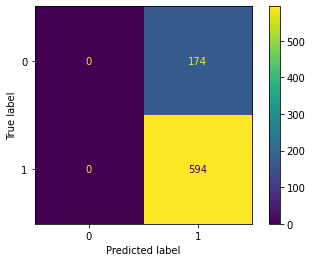

In [123]:
# Construct confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df1['x_republican'], df1['x_republican_sgd'])
display = ConfusionMatrixDisplay(cm)
display.plot()

In [124]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(df1['x_republican'], df1['x_republican_sgd']))
print('Recall:',recall_score(df1['x_republican'], df1['x_republican_sgd']))

Precision: 0.7734375
Recall: 1.0


In [125]:
#F1 score
from sklearn.metrics import f1_score
f1_score(df1['x_republican'],df1['x_republican_sgd'])

0.8722466960352423

### Precision/Recall Trade Off

(array([  4.,  37., 136., 266., 223.,  76.,  19.,   5.,   1.,   1.]),
 array([0.33243687, 0.53551084, 0.73858481, 0.94165877, 1.14473274,
        1.34780671, 1.55088067, 1.75395464, 1.95702861, 2.16010257,
        2.36317654]),
 <BarContainer object of 10 artists>)

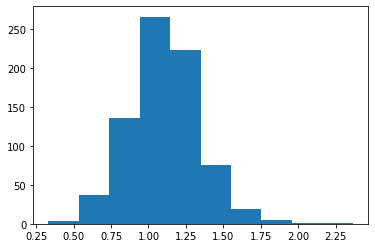

In [127]:
# scores used by SGDClassifier
import matplotlib.pyplot as plt

y_scores = sgd_clf.decision_function(df[features])
plt.hist(y_scores) # histogram of scores

In [128]:
# prediction using default threshold ... 
threshold = 0
(y_scores > threshold).mean()

1.0

In [129]:
# ... gives default model prediction
ypred = sgd_clf.predict(df[features])
ypred.mean()

1.0

In [130]:
# increasing threshold means more zeros are predicted
threshold = 1
(y_scores > threshold).mean()

0.6783854166666666

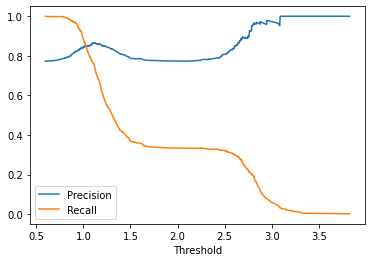

In [131]:
# Visualizing the precision/recall tradeoff
y_scores = cross_val_predict(sgd_clf,
                             df1[features],
                             df1['x_republican'],
                             cv=3,
                             method='decision_function',
                             n_jobs=3)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(df1['x_republican'], y_scores)

import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'Precision')

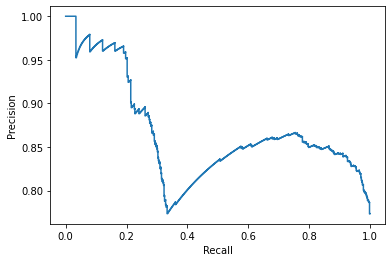

In [132]:
# Plot precision vs recall
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [133]:
# Assessing other scoring thresholds
ypred_lower = y_scores > -1
ypred_higher = y_scores > 1

print('Precision for Low Threshold:',precision_score(y, ypred_lower))
print('Precision for High Threshold:',precision_score(y, ypred_higher))
print('Recall for Low Threshold:',recall_score(y, ypred_lower))
print('Recall for High Threshold:',recall_score(y, ypred_higher))

Precision for Low Threshold: 0.7734375
Precision for High Threshold: 0.8426966292134831
Recall for Low Threshold: 1.0
Recall for High Threshold: 0.8838383838383839


Text(0, 0.5, 'True Positive Rate')

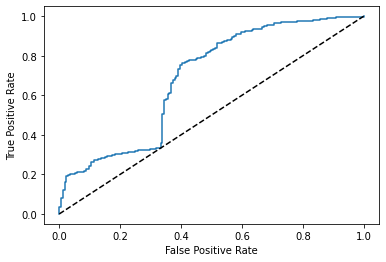

In [134]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [135]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_scores)

0.6859108324625566

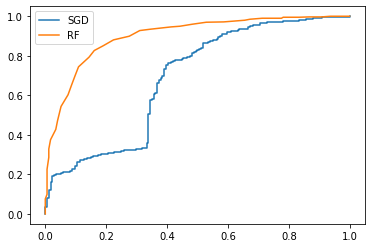

In [137]:
# Random Forests and predict_proba()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
X500 = np.array(X500)
y_probas_rfc = cross_val_predict(rfc,
                                 X500,
                                 y,
                                 cv=3,
                                 method='predict_proba',
                                 n_jobs=3)

y_scores_rfc = y_probas_rfc[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y,y_scores_rfc) 

# compare precision/recall tradeoff for SGD and RF classifiers
plt.plot(fpr, tpr, label="SGD")
plt.plot(fpr_rfc, tpr_rfc, label="RF")
plt.legend()

In [138]:
roc_auc_score(y,y_scores_rfc)

0.9004170053020628

## Multinomial Classification

In [139]:
author = df['authorship']
authpred = cross_val_predict(sgd_clf,
                              X500,
                              author,
                              cv=7)
print((authpred == author).mean())
list(zip(author[:8],authpred[:8]))

0.203125


[('GINSBURG', 'GINSBURG'),
 ('STEVENS', 'STEVENS'),
 ("O'CONNOR", 'KENNEDY'),
 ('KENNEDY', 'SOUTER'),
 ('KENNEDY', 'KENNEDY'),
 ('SOUTER', 'SOUTER'),
 ('BREYER', 'BREYER'),
 ('GINSBURG', 'THOMAS')]

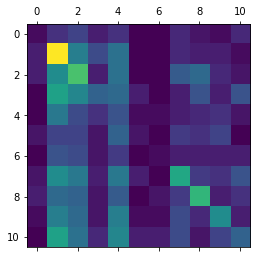

In [140]:
# Multi-class confusion matrix
conf_mx = confusion_matrix(author,authpred)
conf_mx
plt.matshow(conf_mx)
plt.show()

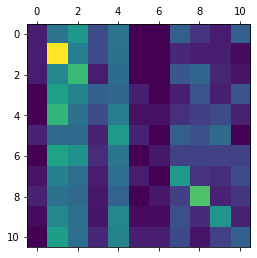

In [141]:
# normalize colors
conf_mx_norm = conf_mx / conf_mx.sum(axis=1, keepdims=True)
plt.matshow(conf_mx_norm)

## Multinomial Logistic

In [142]:

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1, # default L2 penalty # .01, .1, 1, 2, 10
                              class_weight='balanced')

scores = cross_val_score(logistic,
                         Xscale[:1000],
                         author[:1000],
                         cv=3,
                         n_jobs=3)

scores.mean(), scores.std()

(0.09765625, 0.01390244564066577)

# Ensemble Learning

In [143]:
Y = df1['x_republican'] > 0

# Bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=50,
        max_samples=100, bootstrap=True, n_jobs=-1
    )

cross_val_score(bag_clf, X500, Y).mean()

0.7981750275867923

In [144]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1)
y_pred_rf = cross_val_predict(rnd_clf, X500, Y)                              
confusion_matrix(Y,y_pred_rf)

array([[  2, 172],
       [  0, 594]])

In [147]:
rnd_clf.fit(X500,Y)
feature_importances = rnd_clf.feature_importances_
sorted(zip(feature_importances, word), reverse=True)

[(0.0029693369881508783, 'o'),
 (0.0022265739753957138, 'r'),
 (0.0012607091278753317, 'y'),
 (0.00034628666033669533, 'k')]

In [146]:
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
dfX = pd.DataFrame(X500,columns=vocab)
xgb_clf = XGBClassifier()
cross_val_score(xgb_clf, dfX, Y).mean()

0.8749681690858161

In [148]:
xgb_reg = XGBRegressor(feature_names=vocab)
xgb_reg.fit(dfX,Y)
sorted(zip(xgb_reg.feature_importances_, vocab),reverse=True)[:10]

[15:31:19] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.



[(0.033571474, 'analysis'),
 (0.031830106, 'new york'),
 (0.029660394, 'granted certiorari'),
 (0.026276007, 'sought'),
 (0.025258558, 'related'),
 (0.023935124, 'stated'),
 (0.023086436, 'internal quotation'),
 (0.021765428, 'require'),
 (0.021112507, 'light'),
 (0.021009019, 'added')]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

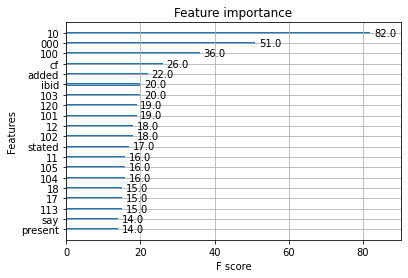

In [149]:
from xgboost import plot_importance
plot_importance(xgb_reg, max_num_features=20)

## Keras MLP 

For more information about keras, have a look [here](https://keras.io/).

**Classification**

In [172]:
# setup
%matplotlib notebook
# set this to your working directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['opinion_text'])
pd.to_pickle(X,'X.pkl')
vocab = vectorizer.get_feature_names_out()
pd.to_pickle(vocab,'vocab.pkl')
Y = df['x_republican']

X.shape

(768, 1000)

In [174]:
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957


In [175]:
# Getting started with Keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # create a sequential model
model.add(Dense(50, # output neurons in layer       
          input_dim=X.shape[1], # number of inputs
          activation='relu')) # activation function
model.add(Dense(50, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                50050     
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 52,651
Trainable params: 52,651
Non-trainable params: 0
_________________________________________________________________


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


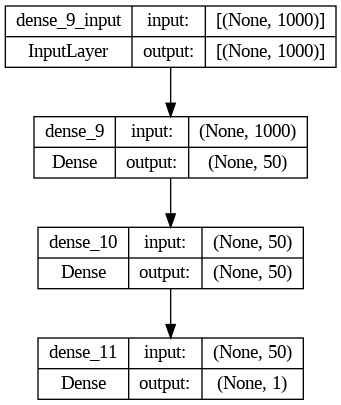

In [176]:
# Visualize a model

# Requires graphviz!

!pip install pydot
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [177]:
# fit the model
model.compile(loss='binary_crossentropy', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=['accuracy']) # compute accuracy, for scoring

In [178]:
model_info = model.fit(X.todense(), Y, 
                      epochs=5,
                      validation_split=.2)

Epoch 1/5
20/20 [==============================] - 1s 16ms/step - loss: 1.0955 - accuracy: 0.6759 - val_loss: 0.5690 - val_accuracy: 0.7338
Epoch 2/5
20/20 [==============================] - 0s 11ms/step - loss: 0.3578 - accuracy: 0.8436 - val_loss: 0.4861 - val_accuracy: 0.7727
Epoch 3/5
20/20 [==============================] - 0s 14ms/step - loss: 0.1980 - accuracy: 0.9365 - val_loss: 0.4483 - val_accuracy: 0.7792
Epoch 4/5
20/20 [==============================] - 0s 11ms/step - loss: 0.1233 - accuracy: 0.9756 - val_loss: 0.4739 - val_accuracy: 0.7922
Epoch 5/5
20/20 [==============================] - 0s 13ms/step - loss: 0.0751 - accuracy: 0.9902 - val_loss: 0.4515 - val_accuracy: 0.8117


In [179]:
# these are the learned coefficients
model.get_weights()

[array([[-0.0349092 ,  0.01918373, -0.00807228, ..., -0.07422383,
         -0.02415457, -0.00839613],
        [-0.00464767,  0.0620629 , -0.04848541, ...,  0.00351014,
         -0.03372635, -0.0142856 ],
        [-0.06615455, -0.01116724, -0.04963336, ..., -0.05214065,
          0.06335019,  0.04270334],
        ...,
        [ 0.03423953, -0.01405295, -0.08527194, ..., -0.01049562,
         -0.00487138,  0.02797806],
        [ 0.0534591 ,  0.0344811 ,  0.0419445 , ...,  0.05135473,
         -0.03502513, -0.02852994],
        [-0.03497391, -0.05665093,  0.03792141, ...,  0.04729334,
          0.05064217,  0.02267743]], dtype=float32),
 array([-2.40681134e-03,  2.83702021e-03,  6.30038138e-03,  4.20981366e-03,
        -6.43596379e-03, -2.72791856e-03,  3.46907414e-03, -1.31723359e-02,
        -2.84948340e-03,  6.84115151e-03,  8.65409244e-03,  3.30262398e-03,
        -7.17477035e-03, -6.46865787e-03,  9.96417180e-03, -2.62982980e-03,
        -2.88982294e-03,  7.51355477e-03, -9.47074313e

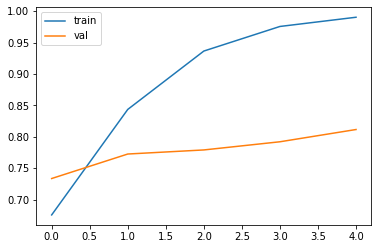

In [182]:
# Plot performance by epoch
%matplotlib inline
plt.plot(model_info.epoch,model_info.history['accuracy'])
plt.plot(model_info.epoch,model_info.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')


In [183]:
# form probability distribution over classes
Ypred_prob = model.predict(X.todense())
print (Ypred_prob.squeeze()[:5])
Ypred = (Ypred_prob > .5).astype(float)
print (Ypred.squeeze()[:5])

24/24 [==============================] - 0s 2ms/step
[0.19994803 0.88606805 0.8662629  0.9999596  0.9278177 ]
[0. 1. 1. 1. 1.]


In [184]:
# Save a model
model.save('keras-clf.pkl')

In [185]:
# load model
from keras.models import load_model
model = load_model('keras-clf.pkl')

**Regression**

In [186]:
# Regression model with R-squared
Yreg = df['log_cite_count']


model = Sequential() # create a sequential model
model.add(Dense(100, # output neurons in layer       
          input_dim=X.shape[1], # number of inputs
          activation='relu')) # activation function
model.add(Dense(50, activation='relu')) # hidden layer
model.add(Dense(1)) # output layer

from keras import backend as K
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(loss='mean_squared_error', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=[r2]) # compute r-squared
model_info = model.fit(X.todense(), Yreg, 
                      epochs=15)

from sklearn.metrics import r2_score
Ypred = model.predict(X.todense())

print (Yreg[:5], Ypred.squeeze()[:5])
r2_score(Yreg,Ypred.squeeze())


Epoch 1/15
24/24 [==============================] - 1s 4ms/step - loss: 19.0352 - r2: -7.9595
Epoch 2/15
24/24 [==============================] - 0s 7ms/step - loss: 7.2354 - r2: -2.7425
Epoch 3/15
24/24 [==============================] - 0s 8ms/step - loss: 4.1149 - r2: -1.0175
Epoch 4/15
24/24 [==============================] - 0s 6ms/step - loss: 2.5208 - r2: -0.1717
Epoch 5/15
24/24 [==============================] - 0s 8ms/step - loss: 1.7851 - r2: 0.0682
Epoch 6/15
24/24 [==============================] - 0s 8ms/step - loss: 1.2249 - r2: 0.3689
Epoch 7/15
24/24 [==============================] - 0s 8ms/step - loss: 0.9204 - r2: 0.5501
Epoch 8/15
24/24 [==============================] - 0s 9ms/step - loss: 0.7200 - r2: 0.6479
Epoch 9/15
24/24 [==============================] - 0s 10ms/step - loss: 0.6341 - r2: 0.7037
Epoch 10/15
24/24 [==============================] - 0s 9ms/step - loss: 0.7054 - r2: 0.6769
Epoch 11/15
24/24 [==============================] - 0s 10ms/step - loss:

0.9161085795082079

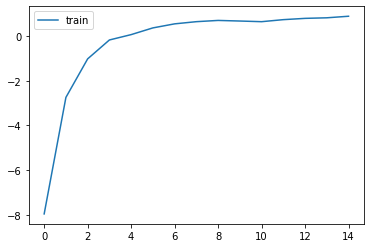

In [187]:
%matplotlib inline

# Plot performance by epoch
plt.plot(model_info.epoch,model_info.history['r2'])
plt.legend(['train', 'val'], loc='best')


## Autoencoders

neural nets that perform domain-specific lossy compression

In [188]:
# Autoencoder

from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # create a sequential model
model.add(Dense(100, # first compression layer       
          input_dim=X.shape[1], # number of inputs
          activation='relu')) # activation function
model.add(Dense(25, activation='relu', name="compression_layer")) # final compression layer layer
model.add(Dense(100, activation='relu')) # first reconstruction layer
model.add(Dense(X.shape[1], activation='relu')) # final reconstruction layer
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               100100    
                                                                 
 compression_layer (Dense)   (None, 25)                2525      
                                                                 
 dense_16 (Dense)            (None, 100)               2600      
                                                                 
 dense_17 (Dense)            (None, 1000)              101000    
                                                                 
Total params: 206,225
Trainable params: 206,225
Non-trainable params: 0
_________________________________________________________________


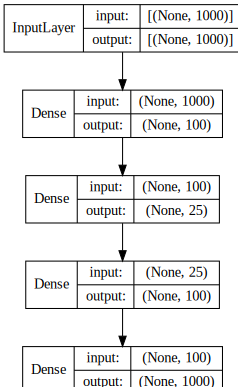

In [189]:
# Visualize a model

# Requires graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
dot = model_to_dot(model,
                   show_shapes=True,
                   show_layer_names=False,
                   dpi=70)
SVG(dot.create(prog='dot', format='svg'))

In [190]:
# fit the model
model.compile(loss='mean_squared_error', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=[r2]) # compute accuracy, for scoring

model_info = model.fit(X.todense(), X.todense(), 
                      epochs=10,
                      validation_split=.2)

Epoch 1/10
20/20 [==============================] - 2s 41ms/step - loss: 19.9520 - r2: 0.0043 - val_loss: 16.5208 - val_r2: 0.0476
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 18.5096 - r2: 0.0763 - val_loss: 16.0163 - val_r2: 0.0772
Epoch 3/10
20/20 [==============================] - 0s 19ms/step - loss: 17.7591 - r2: 0.1146 - val_loss: 15.4777 - val_r2: 0.1082
Epoch 4/10
20/20 [==============================] - 0s 20ms/step - loss: 17.0723 - r2: 0.1483 - val_loss: 15.0377 - val_r2: 0.1339
Epoch 5/10
20/20 [==============================] - 0s 22ms/step - loss: 16.3432 - r2: 0.1826 - val_loss: 14.6573 - val_r2: 0.1559
Epoch 6/10
20/20 [==============================] - 0s 22ms/step - loss: 15.5691 - r2: 0.2208 - val_loss: 14.2404 - val_r2: 0.1805
Epoch 7/10
20/20 [==============================] - 0s 22ms/step - loss: 14.8119 - r2: 0.2561 - val_loss: 14.0249 - val_r2: 0.1940
Epoch 8/10
20/20 [==============================] - 1s 27ms/step - loss: 14.0731 - 

In [191]:
# compress the data

import keras


compression_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer("compression_layer").output)
X_compressed = compression_model(X.todense())
print (X_compressed.shape)

(768, 25)


[0.06008335 0.03858287 0.03146098]


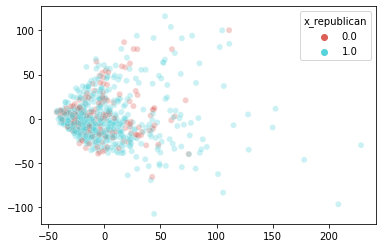

In [194]:
#%% PCA Viz

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# visualize X and X_compressed
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='randomized')
Xpca = pca.fit_transform(np.asarray(X.todense()))
print(pca.explained_variance_ratio_)

sns.scatterplot(
    x=Xpca[:,0], y=Xpca[:,1],
    hue=Y,
    palette=sns.color_palette("hls", len(set(Y))), alpha=0.3)

plt.show()

[0.36757138 0.11153588 0.07392318]


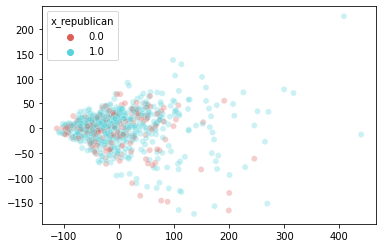

In [195]:
# visualize X and X_compressed
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='randomized')
Xpca = pca.fit_transform(X_compressed)
print(pca.explained_variance_ratio_)


sns.scatterplot(
    x=Xpca[:,0], y=Xpca[:,1],
    hue=Y,
    palette=sns.color_palette("hls", len(set(Y))), alpha=0.3)
plt.show()